# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Naufal Fadli Muzakki
- **Email:** 222112245
- **ID Dicoding:** nf_muzakki

## Menentukan Pertanyaan Bisnis

- Stasiun mana yang memiliki rata-rata PM2.5 tertinggi dalam lima tahun terakhir (2012–2016), dan bagaimana trennya dari tahun ke tahun?
- Pada jam, hari, dan bulan apa tingkat polusi PM2.5 paling tinggi di setiap stasiun selama periode 2013–2017?
- Bagaimana hubungan antara suhu, tekanan udara, titik embun, curah hujan, arah angin, dan kecepatan angin dengan tingkat PM2.5 selama periode 2013–2017?

## Import Semua Packages/Library yang Digunakan

Pada awalnya, semua packages/library dimuat untuk membantu melakukan analisis:

In [25]:
import os
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [26]:
warnings.filterwarnings("ignore")  # Menghilangkan warning

## Data Wrangling

### Gathering Data

Berdasarkan data [Air Quality Dataset](https://github.com/marceloreis/HTI/tree/master) yang menggambarkan pemantauan kualitas udara di beberapa lokasi stasiun pengukuran di China, memungkinkan dilakukan analisis yang lebih mendalam untuk mendapatkan insight dari data. Data terdiri atas 420768 baris dan 18 kolom. Berikut merupakan detail dari setiap variabel:

| No  | Column Name | Description |
|-----|------------|-------------|
| 1   | No         | Row number |
| 2   | year       | Year of data in this row |
| 3   | month      | Month of data in this row |
| 4   | day        | Day of data in this row |
| 5   | hour       | Hour of data in this row |
| 6   | PM2.5      | PM2.5 concentration (µg/m³) |
| 7   | PM10       | PM10 concentration (µg/m³) |
| 8   | SO2        | SO2 concentration (µg/m³) |
| 9   | NO2        | NO2 concentration (µg/m³) |
| 10  | CO         | CO concentration (µg/m³) |
| 11  | O3         | O3 concentration (µg/m³) |
| 12  | TEMP       | Temperature (°C) |
| 13  | PRES       | Pressure (hPa) |
| 14  | DEWP       | Dew point temperature (°C) |
| 15  | RAIN       | Precipitation (mm) |
| 16  | wd         | Wind direction |
| 17  | WSPM       | Wind speed (m/s) |
| 18  | station    | Name of the air-quality monitoring site |

Dataset `PRSA_Data_20130301-20170228` terdiri dari 12 file CSV di mana masing-masing mewakili lokasi stasiun pengukuran yang berbeda. Untuk menggabungkan semua data ke dalam satu `data.frame`, digunakan loop agar setiap file CSV dapat dimuat dan digabungkan secara otomatis. Kolom `station` sebagai label yang menunjukkan lokasi stasiun pengukuran kualitas udara.

In [27]:
# Folder path
folder_path = "./PRSA_Data_20130301-20170228/"

# Mendapatkan daftar semua file dalam folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Membuat DataFrame kosong dengan nama kolom yang sesuai
columns = ["No", "year", "month", "day", "hour", "PM2.5", "PM10", "SO2", "NO2", "CO", "O3",
           "TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM", "station"]
data_polusi = pd.DataFrame(columns=columns)

# Looping untuk membaca dan menggabungkan semua file
for file in files:
    df = pd.read_csv(os.path.join(folder_path, file))
    data_polusi = pd.concat([data_polusi, df], ignore_index=True)

data_polusi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Dataset merupakan data time series dengan series jam (1 jam sekali) terkait kualitas udara dan cuaca dari Maret 2017 hingga Februari 2017 di beberapa stasiun pengukuran China
- Variabel polutan seperti PM2.5, PM10, SO2, NO2, CO, dan O3 menggambarkan kondisi kualitas udara
- Variabel cuaca/meteorologi seperti TEMP, PRES, DEWP, RAIN, wd, WSPM memungkinkan analisis hubungan dengan kualitas udara 

### Assessing Data

#### Data Summary

In [28]:
data_polusi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  object 
 1   year     420768 non-null  object 
 2   month    420768 non-null  object 
 3   day      420768 non-null  object 
 4   hour     420768 non-null  object 
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), object(7)
memory usage: 57.8+ MB


In [29]:
data_polusi.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [30]:
data_polusi.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.0,420768.0,420768.0,420768.0,420768.0,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,35064.0,5.0,12.0,31.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,1.0,2016.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,12.0,105408.0,35712.0,13824.0,17532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,NaN,NaN,NaN,NaN,NaN,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,NaN,NaN,NaN,NaN,NaN,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,NaN,NaN,NaN,NaN,NaN,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


**Insight:**
- Terdapat kolom `No` yang menunjukkan urutan data sudah tidak diperlukan lagi karena analisis akan dilakukan berdasarkan series waktu, sehingga akan didrop pada tahap Cleaning
- Variabel `year`, `month`, `day`, dan `hour` masih terpisah dalam kolom berbeda, sehingga dalam data cleaning perlu dibuat kolom baru yang menyatukan ketiganya sebagai index series
- Terdapat indikasi missing value karena jumlah Non-Null Count yang berbeda-beda


#### Check Unique Values

In [31]:
for col in data_polusi.select_dtypes(include=['object']).columns:
    print(data_polusi[col].value_counts(dropna=False))
    print("-" * 20)

No
1        12
23379    12
23373    12
23374    12
23375    12
         ..
11683    12
11682    12
11681    12
11680    12
35064    12
Name: count, Length: 35064, dtype: int64
--------------------
year
2016    105408
2014    105120
2015    105120
2013     88128
2017     16992
Name: count, dtype: int64
--------------------
month
3     35712
5     35712
7     35712
8     35712
10    35712
12    35712
1     35712
4     34560
6     34560
9     34560
11    34560
2     32544
Name: count, dtype: int64
--------------------
day
1     13824
2     13824
28    13824
27    13824
26    13824
25    13824
24    13824
23    13824
22    13824
21    13824
20    13824
19    13824
18    13824
17    13824
16    13824
15    13824
14    13824
13    13824
12    13824
11    13824
10    13824
9     13824
8     13824
7     13824
6     13824
5     13824
4     13824
3     13824
29    12960
30    12672
31     8064
Name: count, dtype: int64
--------------------
hour
0     17532
1     17532
22    17532
21    17532
20 

**Insight:**
- Setiap stasiun memiliki jumlah observasi yang sama (35.064), yang menunjukkan bahwa data dikumpulkan secara seragam di semua lokasi.
- Data terkumpul dari 2013 hingga 2017, tetapi jumlah data per tahun bervariasi. Perlu diperhatikan dalam analisis bahwa tahun 2013 dan 2017 hanya parsial tidak utuh satu tahun.

#### Check Missing Values

In [32]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

**Insight:**
- Output ini merupakan kelanjutan dari pemeriksaan awal yang telah dilakukan dengan method info() sebelumnya.
- Nampaknya nilai kosong ada di semua variabel kecuali kolom identitas (`No`, `year`, `month`, `day`, `hour`, `station`) namun jumlahnya masih relatif sedikit sehingga bisa diimputasi pada tahap Cleaning

#### Check Duplicated Data

In [33]:
data_polusi.duplicated().sum()

0

**Insight:**
- Tidak terindikasi adanya duplikasi data
- Perlu dilakukan pengecekan duplikasi pada tahap cleaning, karena di tahap ini masih terdapat kolom `No` sebagai series yang mungkin membuat tidak terindikasinya data duplikat

#### Check Outliers

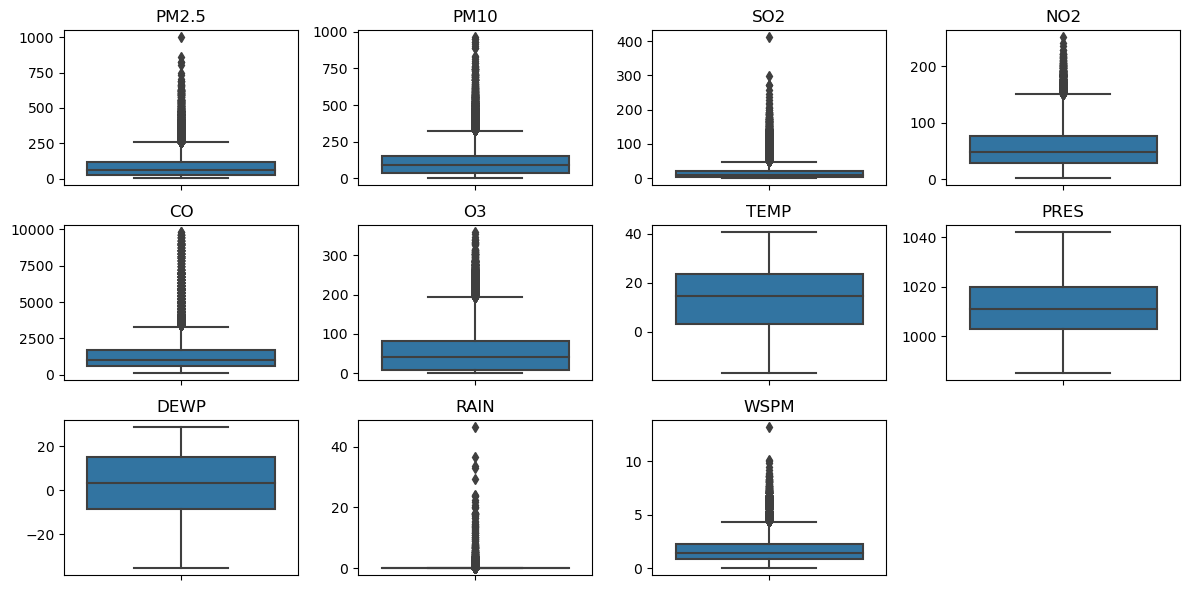

In [34]:
# Mengambil kolom bertipe numerik saja
numerical_columns = [x for x in data_polusi.select_dtypes(include='number')]

# Check keberadaan outlier dengan bantuan boxplot
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel("")
plt.tight_layout()
plt.show()

**Insight:**
- PM2.5, PM10, SO2, NO2, CO, O3 memiliki banyak outlier (ditunjukkan oleh titik-titik di atas whisker) yang menunjukkan adanya anomali atau nilai ekstrem yang mungkin disebabkan oleh lonjakan polusi udara pada kondisi tertentu (misalnya, kebakaran, polusi industri, atau cuaca ekstrem).
- TEMP (Suhu) dan PRES (Tekanan Udara) memiliki distribusi yang lebih stabil dengan sedikit atau tanpa outlier yang menandakan bahwa parameter cuaca relatif lebih stabil dibandingkan dengan polutan udara.
- Terlihat ada outlier signifikan pada variabel RAIN, yang menunjukkan bahwa beberapa hari mengalami curah hujan yang jauh lebih tinggi dibandingkan rata-rata hari lainnya. Hal ini bisa disebabkan oleh musim hujan atau peristiwa cuaca ekstrem tertentu.
- Dalam kasus ini outlier tidak perlu dieliminasi karena analisis dilakukan secara time series yang justru perlu menangkap pola data polutan dan cuaca. Selain itu data cuaca dan polutan memang memungkinkan terdapat lonjakan di titik series tertentu.

### Cleaning Data

#### Drop kolom yang tidak digunakan

Proses ini bertujuan untuk menghapus kolom-kolom yang tidak relevan atau kurang berguna untuk analisis yang akan dilakukan. Kolom yang akan dihapus pada proyek ini adalah `No`.

In [35]:
df_clean = data_polusi.copy()

df_clean.drop(columns=['No'], inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  object 
 1   month    420768 non-null  object 
 2   day      420768 non-null  object 
 3   hour     420768 non-null  object 
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), object(6)
memory usage: 54.6+ MB


#### Feature Engineering

Proses ini bertujuan untuk membuat fitur baru berdasarkan fitur yang sudah ada untuk digunakan dalam analisis yang akan dilakukan. Dalam proyek ini, dibuat kolom baru `time` dari kolom `year`, `month`, `day`, dan `hour` untuk digunakan dalam analisis *timeseries*.

In [36]:
# Membuat kolom tambahan dengan format tanggal
df_clean["time"] = df_clean.apply(
    lambda row: datetime(row["year"], row["month"], row["day"], row["hour"]), axis=1
)
df_clean = df_clean.set_index('time')

df_clean.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
time,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


#### Handling Missing Values

Untuk mengatasi missing value pada data, dilakukan imputasi dengan memperhatikan metode imputasi yang disesuaikan dengan karakteristik variabel terkait. Pada variabel polutan udara (PM2.5, PM10, SO2, NO2, CO, O3) cenderung memiliki pola temporal (harian, mingguan, musiman), sehingga interpolasi berbasis waktu dapat mengisi nilai yang hilang dengan lebih akurat. Setiap stasiun memiliki tren polusi udara yang berbeda, jadi data dikelompokkan berdasarkan `station` lalu menerapkan interpolasi dalam kelompok tersebut. `bfill()` dan `ffill()` digunakan untuk mengisi missing yang ada di ujung data karena `interpolate()` saja tidak bisa mengatasinya.

In [37]:
df_clean[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = df_clean.groupby('station', group_keys=False)[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].apply(
    lambda x: x.sort_index().interpolate(method='time').bfill().ffill()
)

Variabel TEMP, PRES, DEWP, RAIN memiliki tren alami berdasarkan pola cuaca, sehingga interpolasi linear dipilih sebagai metode imputasi. Selain itu juga diterapkan pengelompokan berdasarkan `station` untuk mempertahankan tren spesifik lokasi.

In [38]:
df_clean[['TEMP', 'PRES', 'DEWP', 'WSPM', 'RAIN']] = df_clean.groupby('station', group_keys=False)[['TEMP', 'PRES', 'DEWP', 'WSPM', 'RAIN']].apply(lambda x: x.interpolate(method='linear'))

Variabel wd (Wind Direction) bisa diisi dengan modus karena kategori arah angin cenderung tetap dalam periode tertentu. Selain itu juga diterapkan pengelompokan berdasarkan `station` karena arah angin dipengaruhi lokasi geografis.

In [39]:
df_clean['wd'] = df_clean.groupby('station', group_keys=False)['wd'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [40]:
# Cek apakah imputasi sudah berhasil mengisi semua missing value
df_clean.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

In [41]:
df_eda = df_clean.copy()

In [42]:
df_eda.sample(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
time,,,,,,,,,,,,,,,,,
2015-03-24 12:00:00,2015,3,24,12,56.0,105.0,36.0,50.0,1600.0,72.0,11.7,1028.9,-10.6,0.0,ESE,2.0,Tiantan
2015-11-04 03:00:00,2015,11,4,3,176.0,176.0,7.0,119.0,1500.0,2.0,6.1,1018.0,5.1,0.0,ENE,0.7,Guanyuan
2015-12-26 15:00:00,2015,12,26,15,98.0,98.0,12.0,39.0,1500.0,16.0,-0.6,1023.0,-5.4,0.0,W,2.0,Dongsi
2016-07-02 20:00:00,2016,7,2,20,21.0,40.0,2.0,38.0,600.0,159.0,31.0,1000.2,13.7,0.0,SSW,1.8,Nongzhanguan
2015-10-15 13:00:00,2015,10,15,13,67.0,116.0,16.0,18.0,900.0,125.0,23.8,1007.3,8.2,0.0,SSE,1.6,Huairou


### Summary

In [43]:
df_eda.describe(include="all")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.0,420768.0,420768.0,420768.0,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,5.0,12.0,31.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,2016.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,105408.0,35712.0,13824.0,17532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43699,NaN,35064
mean,NaN,NaN,NaN,NaN,79.839718,104.910268,15.913090,50.599018,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN
std,NaN,NaN,NaN,NaN,80.950217,92.431422,21.896609,35.171921,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,NaN,1.246674,NaN
min,NaN,NaN,NaN,NaN,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,NaN,NaN,NaN,NaN,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,NaN,NaN,NaN,NaN,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


### Explore berdasarkan Series Waktu

In [44]:
df_eda.groupby(["hour"]).mean(numeric_only=True)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,
0,87.696481,115.206576,15.138782,57.856557,1376.587941,42.057909,11.281286,1011.172239,3.138281,0.068138,1.357729
1,86.848406,112.031010,15.159580,55.686365,1377.964402,38.381854,10.816535,1011.110142,3.171927,0.052647,1.321957
2,84.803844,107.648670,14.916881,53.311843,1327.441592,34.542478,10.364590,1011.058360,3.113476,0.066159,1.282390
3,82.212727,102.659579,13.741630,52.247905,1275.936632,32.323738,9.967084,1010.992626,3.025596,0.093401,1.257089
4,79.465989,97.945965,13.250695,51.604910,1246.701409,30.723837,9.640465,1010.992752,2.903290,0.069479,1.234681
5,76.538028,94.000502,12.827728,50.624275,1255.430381,28.839288,9.415369,1011.144631,2.822847,0.052031,1.248681
6,74.289174,92.371314,12.795053,50.804619,1272.049460,27.689135,9.612895,1011.405864,2.813115,0.044627,1.292625
7,73.424078,94.006330,13.275031,52.631818,1298.724184,25.884621,10.506137,1011.748851,2.750386,0.039973,1.411051
8,74.403840,98.552736,14.853987,54.285981,1342.035501,27.530761,11.880879,1012.027821,2.627185,0.038763,1.569932


In [45]:
df_eda.groupby(["month"]).mean(numeric_only=True)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,
1,93.760559,113.402751,31.519823,61.318645,1867.140364,27.375438,-1.794542,1022.123134,-14.752261,0.000353,1.876868
2,89.213391,104.625065,29.061615,51.668084,1416.448500,40.435918,1.126107,1020.292354,-13.007204,0.009988,2.009092
3,94.594295,136.718417,27.960784,59.967745,1310.173191,50.748473,8.348466,1013.957213,-7.945209,0.007586,1.976319
4,73.367153,117.304974,14.223826,47.725344,838.221750,70.216093,15.328909,1008.307401,0.187078,0.022885,2.173886
5,63.541148,108.480401,14.582787,42.752848,808.859847,92.511020,21.481823,1002.394436,6.877117,0.045873,2.065579
6,68.837547,86.613679,7.903589,39.070531,982.397803,94.854305,24.554861,999.335043,15.614013,0.132986,1.576930
7,71.401115,84.700310,5.521875,35.653757,905.976696,96.329628,27.194170,998.131404,19.920511,0.267686,1.497536
8,53.465479,71.464460,4.683461,35.893115,831.274478,87.886086,26.642010,1001.233034,18.931459,0.096399,1.448683
9,61.281071,79.481882,6.290065,45.333194,926.963274,54.914020,20.773458,1008.668476,13.978021,0.124375,1.349724


**Insight:**
- Berdasarkan tabulasi rata-rata setiap jam, polutan cenderung lebih tinggi pada dini hari hingga pagi dan menurun saat siang hingga sore
- Berdasarkan tabulasi rata-rata setiap bulan, Konsentrasi polutan cenderung lebih tinggi pada bulan Desember hingga Maret, menunjukkan bahwa polusi udara lebih buruk di musim dingin atau awal tahun. Bulan Agustus dan September memiliki konsentrasi polutan terendah, kemungkinan karena lebih banyak curah hujan atau kondisi atmosfer yang membantu menyebarkan polutan.

### Explore berdasarkan Stasiun Pengukuran

In [46]:
df_eda.groupby(["station", df_eda["year"]]).mean(numeric_only=True)

PM2.5        PM10        SO2        NO2           CO  \
station       year                                                              
Aotizhongxin  2013   82.439202  112.940836  23.599799  63.355500  1163.919458   
              2014   89.747603  122.282112  21.515582  63.164053  1186.718037   
              2015   81.831724  112.176747  14.354195  60.939047  1436.889269   
              2016   74.236680   94.445811  10.833732  48.402493  1190.215164   
              2017   94.379237  106.988347  20.827331  66.229520  1666.454802   
Changping     2013   72.393246   91.176675  19.134785  40.960527  1022.978758   
              2014   79.881998  107.611416  21.250228  45.968002  1229.971461   
              2015   68.832608   93.275696  11.698721  42.725942  1162.431507   
              2016   61.665699   86.632115   8.144126  45.541268  1129.764344   
              2017   79.802966   94.150777  16.431497  51.014831  1535.769774   
Dingling      2013   65.200980   78.884940  13.955578  28.768839   940.035607   
              2014   75.643006   91.554865  14.872983  27.365046   890.734399   
              2015   64.353124   85.374616  11.322508  26.821221   963.934551   
              2016   61.701218   80.707707   7.166041  25.375114   870.810565   
              2017   68.281780   78.526483  13.256356  34.271186  1157.062147   
Dongsi        2013   86.814474  104.619213  23.705583  57.327243  1324.754766   
              2014   87.979304  117.451986  24.209064  57.451142  1379.931507   
              2015   87.128659  112.116832  15.202015  50.321912  1338.498858   
              2016   80.180556  102.829064  11.467327  50.630009  1236.429872   
              2017  102.220692  131.802260  20.364054  57.890890  1623.552260   
Guanyuan      2013   81.651893  108.949074  21.859392  58.866182  1132.745030   
              2014   88.527374  116.123402  23.133562  64.343179  1362.357306   
              2015   82.130183  106.321067  14.073579  54.921958  1313.704338   
              2016   77.132514  104.927026  11.484517  53.459984  1168.169399   
              2017   95.038842  116.255297  21.259181  64.920904  1482.768362   
Gucheng       2013   81.498298  112.558211  17.508021  61.360784  1341.740264   
              2014   90.549121  134.781427  21.290103  62.424463  1442.163242   
              2015   83.685051  116.366929  13.338265  49.588271  1323.144977   
              2016   77.437443  111.118511  10.204121  49.777265  1170.952869   
              2017  100.969986  126.437500  20.587924  62.319915  1804.837571   
Huairou       2013   68.619145   98.509191  18.295972  35.076202   988.408837   
              2014   77.143487   99.877363  17.582237  37.039566  1070.981735   
              2015   70.500148   90.165559   8.662831  28.316707  1038.784247   
              2016   60.919627   82.266280   6.638092  27.278632   927.977004   
              2017   73.865819   91.704802   9.780367  38.856992  1314.971751   
Nongzhanguan  2013   84.377996  103.735090  23.243093  59.518205  1294.818015   
              2014   91.998082  127.224053  24.876495  62.296895  1353.613014   
              2015   85.178584  106.989172  15.809857  58.249709  1382.773973   
              2016   76.096539   97.046790  11.556865  52.538764  1209.369308   
              2017  101.027542  119.663842  20.606638  58.230579  1732.944915   
Shunyi        2013   75.746460   95.145084  15.083344  41.665004  1241.772740   
              2014   85.190993  111.620913  17.699406  46.826393  1173.173516   
              2015   81.456119  100.412780  10.454298  43.097306  1188.407534   
              2016   72.223588   88.047245   9.566541  42.540642  1099.948770   
              2017   95.261299  106.852754  21.213630  55.607345  1789.795198   
Tiantan       2013   83.210172  108.312704  18.202909  53.174606  1311.649714   
              2014   86.689874  114.889526  19.771678  56.159241  1338.590183   
              2015   82.076450  102.863676  11.804817  5

**Insight:**
- Secara umum, ada tren perbaikan kualitas udara dari 2013 ke 2016, tetapi terjadi kenaikan kembali di 2017 pada beberapa parameter.
- Faktor cuaca dan kebijakan lingkungan kemungkinan berpengaruh terhadap fluktuasi polusi.
- Polusi lebih tinggi di daerah perkotaan dibandingkan daerah pinggiran seperti Changping dan Dingling.

### Explore Hubungan Polutan dengan Variabel Meteorologi

Mengeksplorasi hubungan antara polutan dan variabel meteorologi. Kategori variabel hanya berdasarkan kuantil untuk membantu melihat dugaan hubungan variabel polutan dan meteorologi.

In [47]:
# Definisi variabel polutan
polutan_vars = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# Membuat kategori berdasarkan kuantil untuk variabel numerik lainnya
df_eda["TEMP_category"] = pd.qcut(df_eda["TEMP"], q=3, labels=["Dingin", "Sedang", "Panas"])
df_eda["PRES_category"] = pd.qcut(df_eda["PRES"], q=3, labels=["Rendah", "Sedang", "Tinggi"])
df_eda["DEWP_category"] = pd.qcut(df_eda["DEWP"], q=3, labels=["Rendah", "Sedang", "Tinggi"])
df_eda["RAIN_category"] = pd.cut(df_eda["RAIN"], bins=[-1, 0, 10, df_eda["RAIN"].max()], labels=["Kering", "Sedang", "Basah"])
df_eda["WSPM_category"] = pd.qcut(df_eda["WSPM"], q=3, labels=["Pelan", "Sedang", "Kencang"])

# List kategori yang akan digunakan
categories = ["TEMP_category", "PRES_category", "DEWP_category", "RAIN_category", "WSPM_category", "wd"]

for category in categories:
    print(f"\n### Rata-rata polutan berdasarkan {category} ###")
    display(df_eda.groupby(category, observed=False)[polutan_vars].mean(numeric_only=True))


### Rata-rata polutan berdasarkan TEMP_category ###


,PM2.5,PM10,SO2,NO2,CO,O3
TEMP_category,,,,,,
Dingin,94.353212,114.559906,25.511350,60.649567,1763.388525,26.396515
Sedang,76.483222,107.445244,13.402874,53.335176,1052.083918,43.351138
Panas,68.528538,92.582380,8.725564,37.662264,886.495894,102.473349



### Rata-rata polutan berdasarkan PRES_category ###


,PM2.5,PM10,SO2,NO2,CO,O3
PRES_category,,,,,,
Rendah,70.815653,96.775621,9.284222,39.601683,920.911740,92.456072
Sedang,90.261707,120.296270,17.236110,56.484968,1298.082827,48.940138
Tinggi,78.349224,97.478958,21.252945,55.707365,1489.675053,30.157164



### Rata-rata polutan berdasarkan DEWP_category ###


,PM2.5,PM10,SO2,NO2,CO,O3
DEWP_category,,,,,,
Rendah,63.584717,88.636284,22.775007,49.099439,1281.688320,38.950540
Sedang,97.078404,129.351380,17.566665,59.955363,1391.645287,48.494566
Tinggi,78.918804,96.785483,7.345612,42.725878,1032.952316,84.419433



### Rata-rata polutan berdasarkan RAIN_category ###


,PM2.5,PM10,SO2,NO2,CO,O3
RAIN_category,,,,,,
Kering,80.555113,106.334234,16.340045,51.133380,1240.856417,57.462301
Sedang,62.051115,69.810299,5.501301,37.848062,1111.879596,50.561231
Basah,70.700837,77.867261,4.569711,28.341158,1030.156900,85.914892



### Rata-rata polutan berdasarkan WSPM_category ###


,PM2.5,PM10,SO2,NO2,CO,O3
WSPM_category,,,,,,
Pelan,101.311402,124.864161,17.417656,64.585123,1575.970346,35.285734
Sedang,83.574777,105.655109,17.291731,52.156517,1292.740892,57.186637
Kencang,50.255560,80.162679,12.715310,32.210220,768.977499,83.690172



### Rata-rata polutan berdasarkan wd ###


,PM2.5,PM10,SO2,NO2,CO,O3
wd,,,,,,
E,101.707850,124.235321,18.432643,59.663810,1582.685657,47.918060
ENE,97.657624,119.280798,18.634066,63.975943,1612.495644,35.881035
ESE,102.047219,125.603977,18.515968,55.181972,1476.939855,61.274425
N,67.474945,89.954609,12.358044,47.327842,1109.321245,43.126846
NE,86.130956,106.791932,17.372314,59.902941,1421.298180,34.600791
NNE,71.797128,91.647250,14.040944,50.857733,1214.513426,39.936638
NNW,54.186062,77.597948,10.790964,36.885072,938.801698,49.325148
NW,51.917889,79.048181,10.129097,35.616641,890.568927,50.956414
S,89.290759,116.517167,18.447704,47.978575,1211.527664,92.702571


**Insight:**
- Suhu tinggi dan tekanan tinggi cenderung meningkatkan konsentrasi polutan.
- Hujan membantu menurunkan polutan seperti PM2.5, PM10, dan CO.
- Angin berperan dalam penyebaran polutan—angin kencang mengurangi polusi, sementara arah angin tertentu membawa lebih banyak polutan.
- Ozon (O3) memiliki pola unik—lebih tinggi saat kelembaban tinggi dan tekanan rendah, serta meningkat saat angin kencang.

### Korelasi Antar Variabel

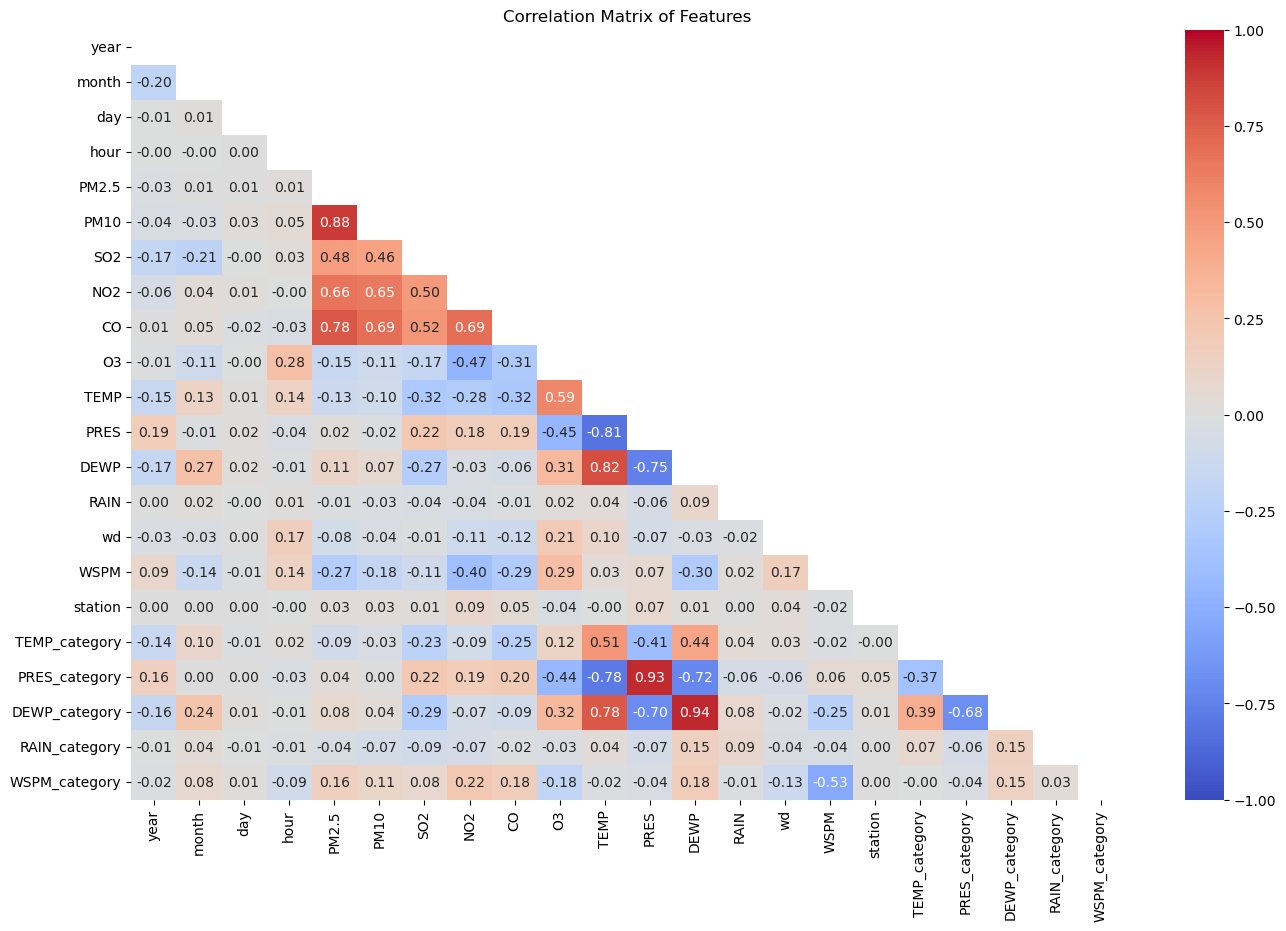

In [48]:
# Mengubah variabel kategorik menjadi numerik dengan Label Encoder
categorical_columns = df_eda.select_dtypes(include=['object', 'category']).columns

le = LabelEncoder()
for col in categorical_columns:
    df_eda[col] = le.fit_transform(df_eda[col])

# Membuat matriks korelasi
correlation_matrix = df_eda.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

**Insight:**
- Polusi udara mungkin dipengaruhi oleh aktivitas kendaraan dan industri, terlihat dari korelasi tinggi antar polutan (PM2.5, CO, NO₂, SO₂).
- Kondisi meteorologi seperti suhu rendah dan tekanan tinggi kemungkinan dapat memperburuk polusi dengan meningkatkan akumulasi polutan di atmosfer.
- Analisis lebih lanjut bisa difokuskan pada perbedaan musim, terutama melihat bagaimana tren polusi berubah sepanjang tahun dan di berbagai jam dalam sehari.

## Visualization & Explanatory Analysis

In [49]:
df_viz = df_clean.copy()

### Pertanyaan 1: Stasiun mana yang memiliki rata-rata PM2.5 tertinggi dalam lima tahun terakhir (2013–2017), dan bagaimana trennya dari tahun ke tahun?

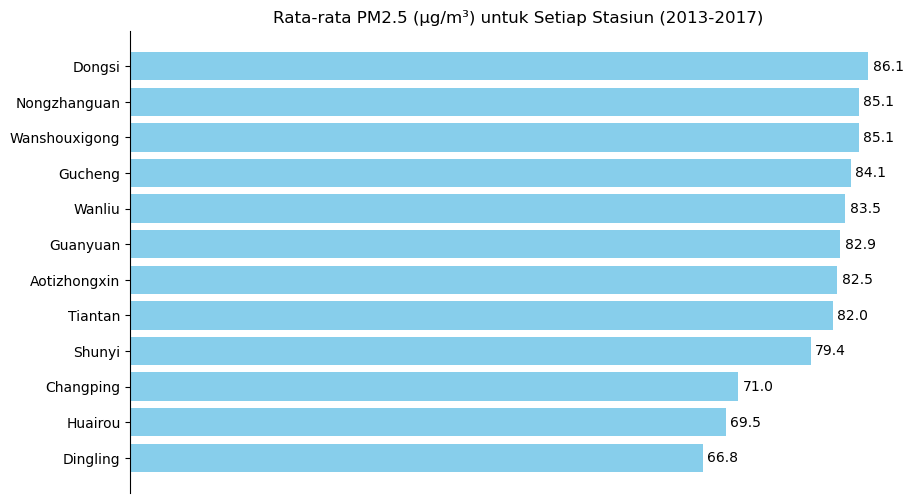

In [50]:
# Hitung rata-rata PM2.5 untuk setiap stasiun dan urutkan dari yang tertinggi
df_avg_pm25 = df_viz.groupby('station', as_index=False)['PM2.5'].mean()
df_avg_pm25 = df_avg_pm25.sort_values(by='PM2.5', ascending=True)  # Urut dari terendah ke tertinggi (karena barh)

fig, ax = plt.subplots(figsize=(10, 6))

# Buat horizontal bar chart
bars = ax.barh(df_avg_pm25['station'], df_avg_pm25['PM2.5'], color='skyblue')

# Menambahkan label angka di ujung setiap bar
for bar in bars:
    xval = bar.get_width() + 0.5  # Beri sedikit jarak
    ax.text(xval, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}', ha='left', va='center', fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.set_ylabel("")
ax.set_title("Rata-rata PM2.5 (µg/m³) untuk Setiap Stasiun (2013-2017)")

plt.show()


**Insight:**
- Stasiun Dongsi memiliki rata-rata PM2.5 tertinggi (86.1 µg/m³), diikuti oleh Nongzhanguan (85.1 µg/m³) dan Wanshouxigong (85.1 µg/m³).
- Dingling (66.8 µg/m³), Huairou (69.5 µg/m³), dan Changping (71.0 µg/m³) adalah stasiun dengan rata-rata PM2.5 terendah.
- Stasiun di area perkotaan (Dongsi, Nongzhanguan, Wanshouxigong, Gucheng, Wanliu, Guanyuan) memiliki konsentrasi PM2.5 lebih tinggi, sedangkan wilayah pinggiran (Dingling, Huairou, Changping) cenderung memiliki kualitas udara yang lebih baik.

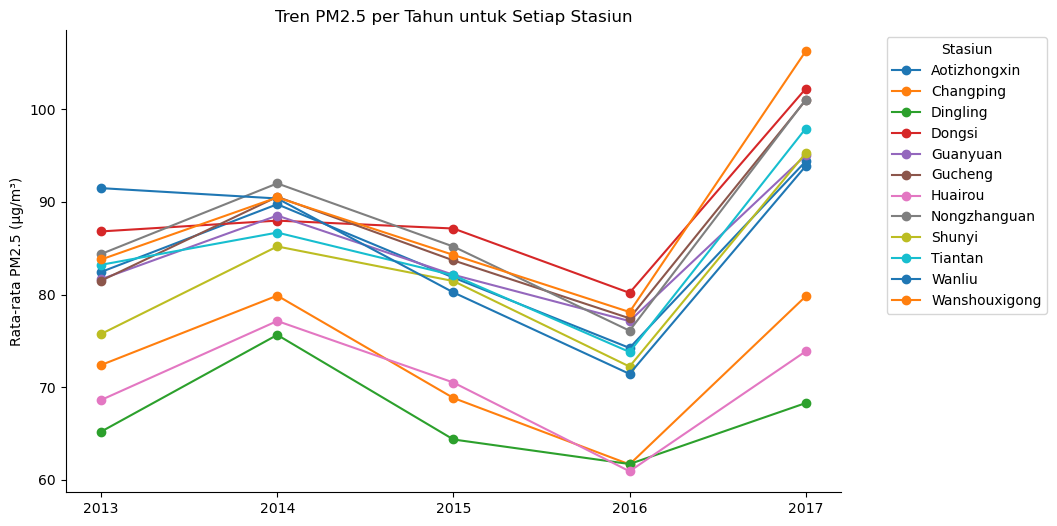

In [51]:
# Hitung total PM2.5 per tahun dan station
df_summary = df_viz.groupby(['station', 'year'], as_index=False)['PM2.5'].mean()

# Konversi 'year' ke string agar jadi label tahun di sumbu X
df_summary['year'] = df_summary['year'].astype(str)

fig, ax = plt.subplots(figsize=(10, 6))

# Loop untuk setiap stasiun
for station, data in df_summary.groupby('station'):
    ax.plot(data['year'], data['PM2.5'], marker='o', label=station)  # Garis + titik

ax.set_xlabel("")
ax.set_ylabel("Rata-rata PM2.5 (µg/m³)")
ax.set_title("Tren PM2.5 per Tahun untuk Setiap Stasiun")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title="Stasiun", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend di luar

plt.show()

**Insight:**
- Jika mengesampingkan Tahun 2017 (Karena data parsial tidak full setahun), tahun 2014 memiliki nilai PM2.5 tertinggi di sebagian besar stasiun. Terjadi penurunan bertahap dari 2014 hingga 2016, kemungkinan karena kebijakan pengendalian polusi udara yang mulai efektif. Tahun 2016 menjadi titik terendah, di mana hampir semua stasiun mencatat konsentrasi PM2.5 yang lebih rendah dibandingkan tahun-tahun sebelumnya.
- Stasiun di daerah perkotaan seperti Dongsi, Wanshouxigong, dan Nongzhanguan cenderung memiliki nilai PM2.5 yang lebih tinggi secara konsisten. Stasiun di daerah pinggiran/pedesaan seperti Dingling dan Huairou menunjukkan tren yang lebih stabil dengan nilai PM2.5 lebih rendah. Changping mengalami fluktuasi besar, terutama peningkatan drastis di 2017

### Pertanyaan 2: Pada jam, hari, dan bulan apa tingkat polusi PM2.5 paling tinggi di setiap stasiun selama periode 2013–2017?

#### Berdasarkan Jam

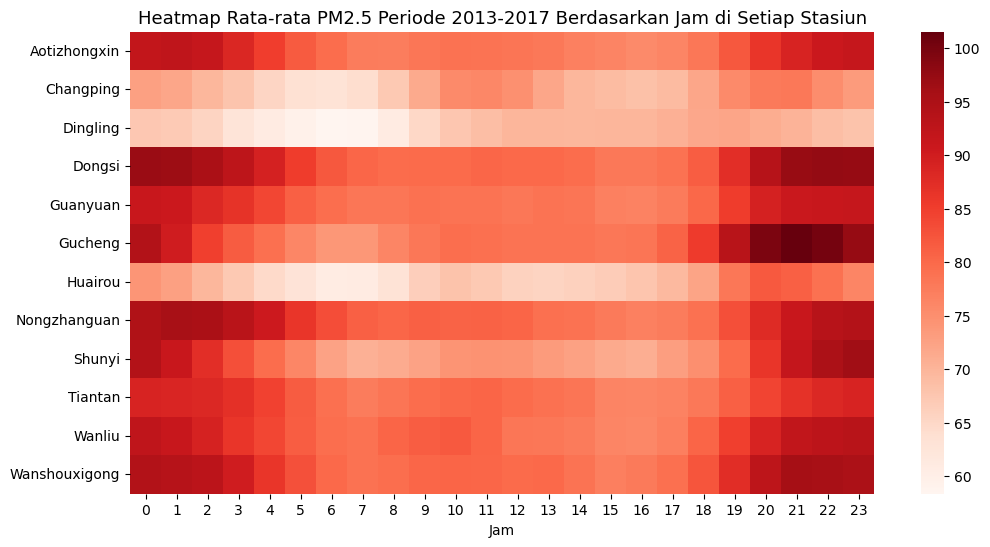

In [52]:
# Agregasi rata-rata PM2.5 per jam
pm25_avg_hour = df_viz.groupby(['station', 'hour'])['PM2.5'].mean().reset_index()

# Buat heatmap
plt.figure(figsize=(12, 6))
pivot_hour = pm25_avg_hour.pivot(index='station', columns='hour', values='PM2.5')
sns.heatmap(pivot_hour, cmap="Reds", annot=False, cbar=True)

plt.title("Heatmap Rata-rata PM2.5 Periode 2013-2017 Berdasarkan Jam di Setiap Stasiun", fontsize=13)
plt.xlabel("Jam")
plt.ylabel("")
plt.show()

**Insight:**
- Secara umum, PM2.5 cenderung lebih tinggi pada dini hari (00:00 - 03:00) dan malam hari (20:00 - 23:00).
- Stasiun seperti Dongsi, Guanyuan, dan Nongzhanguan menunjukkan konsentrasi tinggi pada malam hari.
- Stasiun seperti Aotizhongxin dan Wanshouxigong memiliki level PM2.5 yang tinggi sepanjang malam hingga pagi hari.
- Stasiun Changping, Dingling, dan Huairou memiliki tingkat PM2.5 yang lebih rendah dibandingkan stasiun lainnya sepanjang hari.

#### Berdasarkan Hari

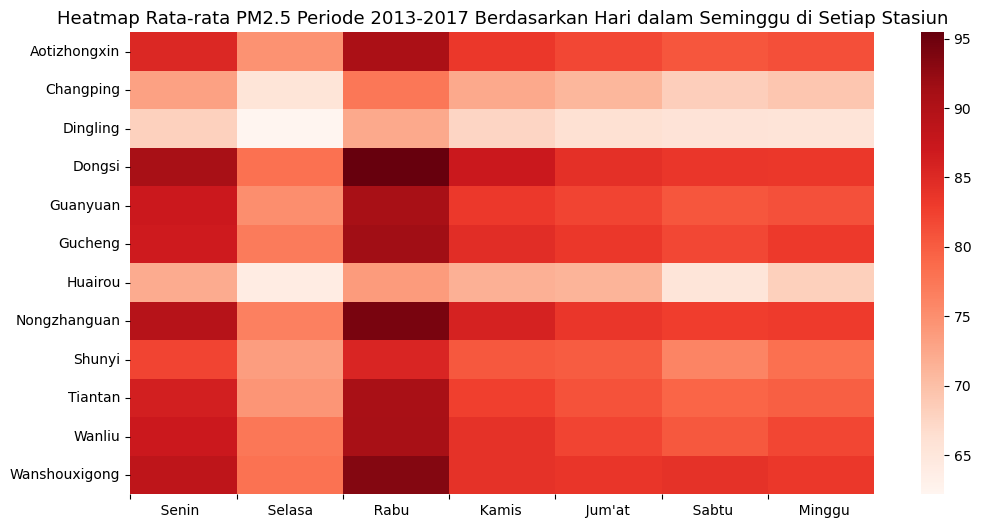

In [53]:
df_viz = df_viz.reset_index()
df_viz['day_name'] = df_viz['time'].dt.day_name()

# Agregasi rata-rata PM2.5 per hari dalam seminggu
pm25_avg_day = df_viz.groupby(['station', 'day_name'])['PM2.5'].mean().reset_index()

# Buat heatmap
plt.figure(figsize=(12, 6))
pivot_day = pm25_avg_day.pivot(index='station', columns='day_name', values='PM2.5')
sns.heatmap(pivot_day, cmap="Reds", annot=False, cbar=True)

plt.title("Heatmap Rata-rata PM2.5 Periode 2013-2017 Berdasarkan Hari dalam Seminggu di Setiap Stasiun", fontsize=13)
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=range(7), labels=["       Senin", "       Selasa", "       Rabu", "       Kamis", "       Jum'at", "       Sabtu", "       Minggu"], ha="left") # Ditambahkan spasi agar pas ditengah labelnya
plt.show()

**Insight:**
- Konsentrasi PM2.5 lebih tinggi pada hari Senin dan Rabu di banyak stasiun. Hal ini mungkin disebabkan lebih banyaknya aktivitas di Weekday daripada Weekend
- Stasiun Dongsi dan Nongzhanguan menunjukkan lonjakan polusi yang lebih signifikan pada hari Rabu.
- Stasiun Changping, Dingling, dan Huairou memiliki tingkat PM2.5 yang lebih rendah dibandingkan stasiun lainnya sepanjang waktu.

#### Berdasarkan Bulan

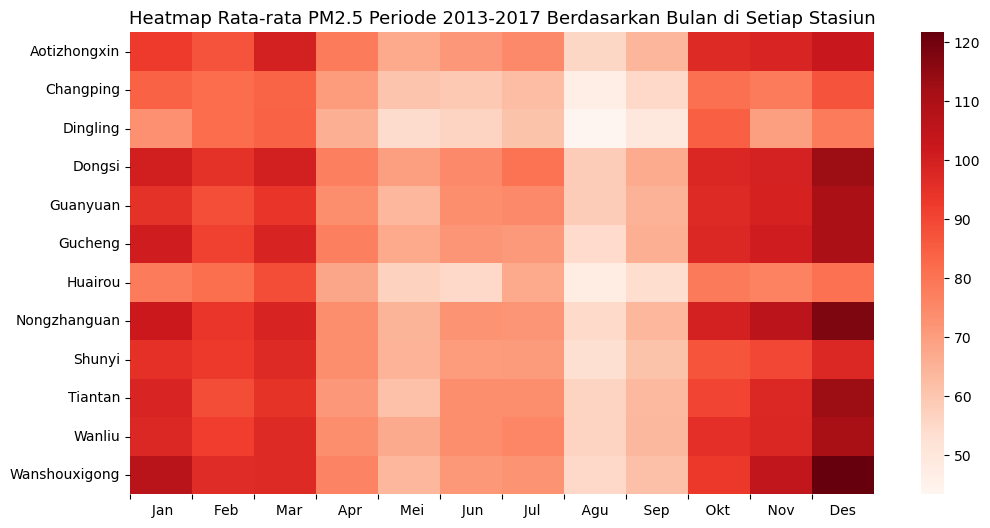

In [54]:
# Agregasi rata-rata PM2.5 per bulan
pm25_avg_month = df_viz.groupby(['station', 'month'])['PM2.5'].mean().reset_index()

# Buat heatmap
plt.figure(figsize=(12, 6))
pivot_month = pm25_avg_month.pivot(index='station', columns='month', values='PM2.5')
sns.heatmap(pivot_month, cmap="Reds", annot=False, cbar=True)

plt.title("Heatmap Rata-rata PM2.5 Periode 2013-2017 Berdasarkan Bulan di Setiap Stasiun", fontsize=13)
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=range(12), labels=["     Jan", "     Feb", "     Mar", "     Apr", "     Mei", "     Jun", "     Jul", "    Agu", "    Sep", "    Okt", "    Nov", "    Des"], ha="left") # Ditambahkan spasi agar pas ditengah labelnya
plt.show()

**Insight:**
- Polusi PM2.5 paling tinggi terjadi pada Oktober, November, Desember, Januari, dan Maret.
- Stasiun Dongsi, Wanshouxigong, dan Nongzhanguan menunjukkan puncak tertinggi pada bulan Desember.
- Stasiun seperti Dingling dan Changping menunjukkan nilai PM2.5 lebih rendah secara keseluruhan tetapi tetap lebih tinggi di bulan Januari.

### Pertanyaan 3: Bagaimana hubungan antara suhu, tekanan udara, titik embun, curah hujan, arah angin, dan kecepatan angin dengan tingkat PM2.5 selama periode 2013–2017?

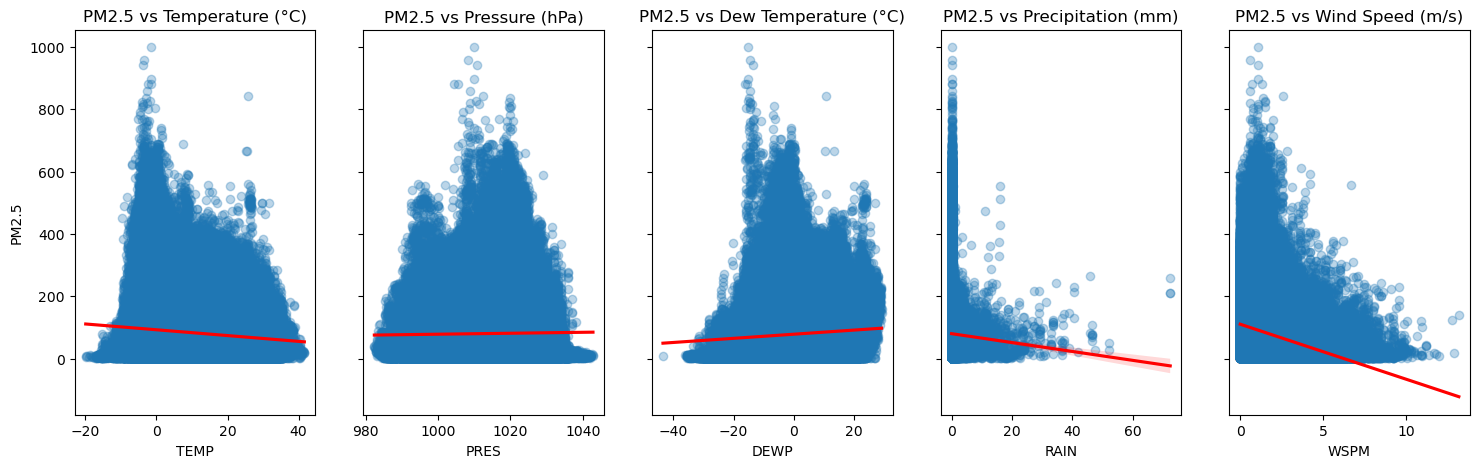

In [55]:
# Plot variabel meteorologi vs PM2.5
variables = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
titles = [
    "PM2.5 vs Temperature (°C)",
    "PM2.5 vs Pressure (hPa)",
    "PM2.5 vs Dew Temperature (°C)",
    "PM2.5 vs Precipitation (mm)",
    "PM2.5 vs Wind Speed (m/s)"
]

# Membuat subplot
fig, axes = plt.subplots(1, 5, figsize=(18, 5), sharey=True)

# Looping untuk membuat plot
for i, var in enumerate(variables):
    sns.regplot(x=df_eda[var], y=df_eda["PM2.5"], ax=axes[i], 
                scatter_kws={'alpha': 0.3}, line_kws={"color": "red"})
    axes[i].set_title(titles[i])
    if i > 0:  # Hanya subplot pertama yang memiliki label sumbu y
        axes[i].set_ylabel("")

# Menampilkan plot
plt.show()

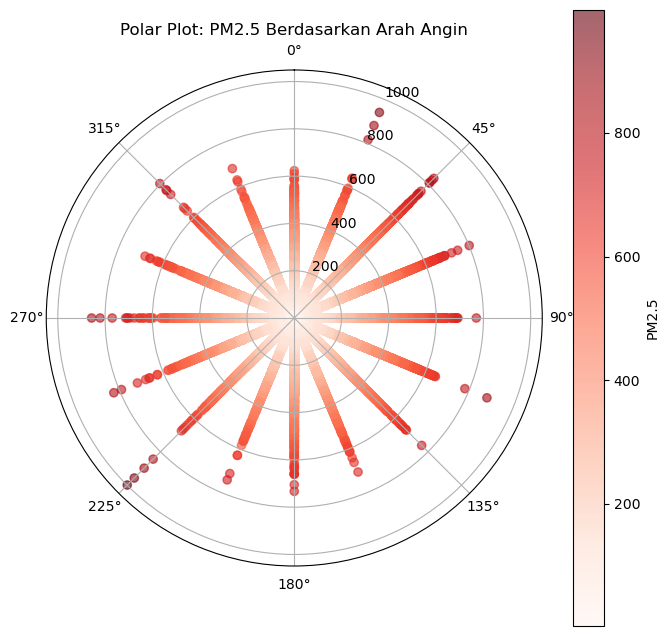

In [65]:
# Mapping arah mata angin ke derajat
wind_dir_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Konversi nilai string ke angka derajat
df_viz["wd_numeric"] = df_viz["wd"].map(wind_dir_map)

# Konversi ke radian
df_viz["wd_rad"] = np.radians(df_viz["wd_numeric"])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
sc = ax.scatter(df_viz["wd_rad"], df_viz["PM2.5"], c=df_viz["PM2.5"], cmap="Reds", alpha=0.6)

ax.set_theta_zero_location("N")  # Utara di atas
ax.set_theta_direction(-1)  # Arah searah jarum jam
plt.colorbar(sc, label="PM2.5")
plt.title("Polar Plot: PM2.5 Berdasarkan Arah Angin")
plt.show()

**Insight:**

Suhu (Temperature - TEMP)
- Terdapat sedikit tren **negatif** antara suhu dan PM2.5.
- Pada suhu yang lebih rendah, konsentrasi PM2.5 cenderung lebih tinggi.
- Ini bisa terjadi karena suhu rendah sering dikaitkan dengan **inversi suhu**, yang dapat menjebak polutan di dekat permukaan.

Tekanan Udara (Pressure - PRES)
- Tidak ada pola yang sangat jelas, namun sedikit tren **negatif** terlihat.
- Tekanan tinggi biasanya dikaitkan dengan kondisi stabil yang dapat memperburuk **penumpukan polusi**.

Titik Embun (Dew Temperature - DEWP)
- Titik embun memiliki sedikit tren **positif** terhadap PM2.5.
- Ini menunjukkan bahwa **kelembaban relatif tinggi** dapat berkontribusi pada pembentukan partikel polutan.

Curah Hujan (Precipitation - RAIN)
- Tren **negatif** yang cukup jelas menunjukkan bahwa **hujan membantu mengurangi** kadar PM2.5.
- Ini terjadi karena hujan mencuci polutan dari udara melalui proses **wet deposition**.

Kecepatan Angin (Wind Speed - WSPM)
- Terdapat tren **negatif yang kuat**, menunjukkan bahwa kecepatan angin yang lebih tinggi membantu **menyebarkan polusi**.
- Saat angin kencang, polutan lebih cepat terdilusi sehingga **konsentrasi PM2.5 menurun**.

Arah Angin (Wind Direction - WD)
- Dari **polar plot**, distribusi PM2.5 tampaknya bervariasi dengan arah angin.
- Beberapa arah angin membawa polusi lebih banyak, sementara arah lain mungkin justru membawa udara bersih.

## Analisis Lanjutan: Clustering Analysis (Manual Grouping)

In [57]:
df_analyze = df_clean.copy()

Analisis ini bertujuan untuk mengetahui kondisi kualitas udara dan upaya menjaga kesehatan. Dengan dilakukannya analaisis ini diharapkan dapat menjadi perhatian masyarakat untuk beraktivitas dengan tetap memperhatikan kondisi kualitas udara yang membahayakan kesehatan. Polutan PM2.5 dan PM10 akan dikelompokkan (clustering) secara manual grouping dengan membuat kolom kategori kualitas udara yang dikategorikan berdasarkan jumlah polutan dengan batas-batas kategori [AQI Basics](https://www.airnow.gov/aqi/aqi-basics/):

| Daily AQI Color | Levels of Concern                     | Values of Index | Description of Air Quality |
|----------------|------------------------------------|----------------|---------------------------|
| **Green**      | Good                               | 0 to 50        | Air quality is satisfactory, and air pollution poses little or no risk. |
| **Yellow**     | Moderate                          | 51 to 100      | Air quality is acceptable. However, there may be a risk for some people, particularly those who are unusually sensitive to air pollution. |
| **Orange**     | Unhealthy for Sensitive Groups    | 101 to 150     | Members of sensitive groups may experience health effects. The general public is less likely to be affected. |
| **Red**        | Unhealthy                         | 151 to 200     | Some members of the general public may experience health effects; members of sensitive groups may experience more serious health effects. |
| **Purple**     | Very Unhealthy                    | 201 to 300     | Health alert: The risk of health effects is increased for everyone. |
| **Maroon**     | Hazardous                         | 301 and higher | Health warning of emergency conditions: everyone is more likely to be affected. |



In [58]:
# source: https://www.airnow.gov/aqi/aqi-basics/

# Fungsi untuk mengkategorikan AQI
def categorize_air_quality(values):
    if values <= 50:
        return 'Good'
    elif values <= 100:
        return 'Moderate'
    elif values <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif values <= 200:
        return 'Unhealthy'
    elif values <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

In [59]:
# Membuat kolom kategori berdasarkan PM2.5 dan PM10
df_analyze['PM2.5_cat'] = df_analyze['PM2.5'].apply(categorize_air_quality)
df_analyze['PM10_cat'] = df_analyze['PM10'].apply(categorize_air_quality)

df_analyze.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,PM2.5_cat,PM10_cat
time,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Good,Good
2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Good,Good
2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Good,Good
2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Good,Good
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Good,Good


In [60]:
# Urutan kategori sesuai AQI
aqi_order = ["Good", "Moderate", "Unhealthy for Sensitive Groups", 
             "Unhealthy", "Very Unhealthy", "Hazardous"]

# Warna sesuai AQI
colors = {
    "Good": "#00E400",  # Hijau
    "Moderate": "#FFFF00",  # Kuning
    "Unhealthy for Sensitive Groups": "#FF7E00",  # Oranye
    "Unhealthy": "#FF0000",  # Merah
    "Very Unhealthy": "#8F3F97",  # Ungu
    "Hazardous": "#7E0023"  # Maroon
}

### Proporsi kategori polutan PM2.5 dan PM10 berdasarkan Bulan

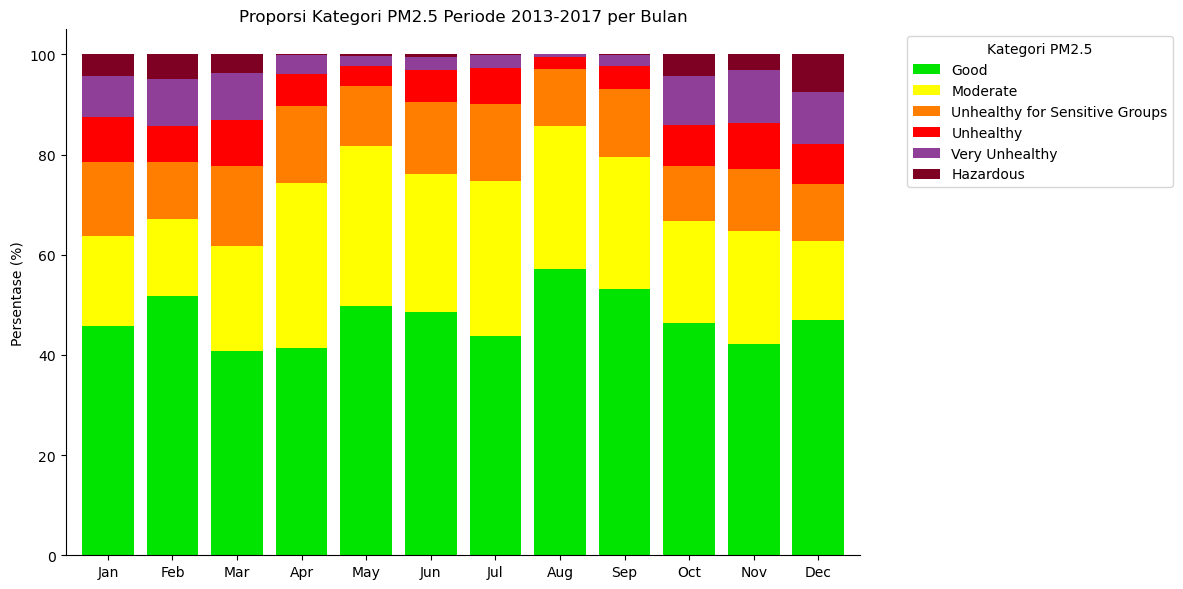

In [61]:
# Hitung persentase kategori per bulan
category_month = df_analyze.groupby(["month", "PM2.5_cat"]).size().unstack()
category_month = category_month.div(category_month.sum(axis=1), axis=0) * 100

# Ubah indeks angka bulan menjadi nama bulan
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
category_month.index = month_labels

# Pastikan kategori dalam urutan yang benar
category_month = category_month[aqi_order]

# Plot stacked bar chart
ax = category_month.plot(kind="bar", stacked=True, figsize=(12, 6), color=[colors[c] for c in aqi_order], width=0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Proporsi Kategori PM2.5 Periode 2013-2017 per Bulan")
plt.xlabel("")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=0)
plt.legend(title="Kategori PM2.5", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Insight:**
- Secara umum, kategori "Good" (hijau) dan "Moderate" (kuning) mendominasi proporsi PM2.5 di setiap bulan, terutama pada bulan April hingga September.
- Musim panas (Juni-September) cenderung memiliki udara yang lebih bersih, sementara musim dingin (Desember-Februari) menunjukkan peningkatan polusi udara.
- Polusi udara yang lebih tinggi di musim dingin dapat menjadi perhatian bagi kelompok rentan seperti anak-anak, lansia, dan penderita penyakit pernapasan.

### Proporsi kategori polutan PM2.5 dan PM10 berdasarkan Stasiun Pengukuran

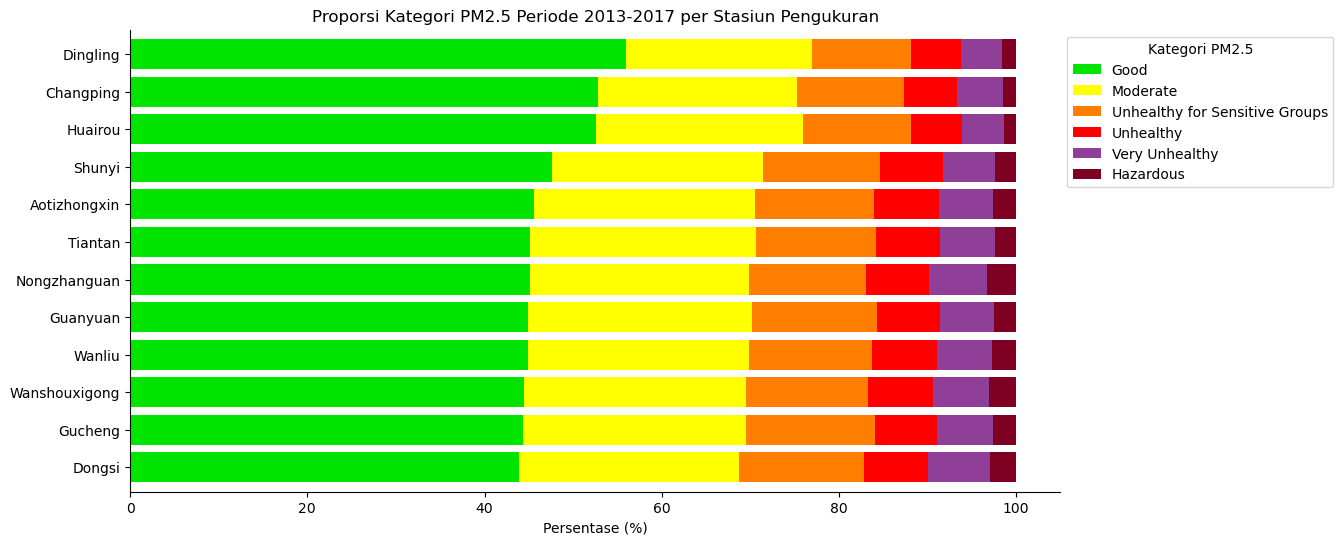

In [62]:
# Hitung distribusi kategori PM2.5 per stasiun
category_station = df_analyze.groupby("station")["PM2.5_cat"].value_counts(normalize=True).unstack() * 100

# Susun ulang kolom agar sesuai urutan AQI
category_station = category_station[aqi_order]

# Urutkan stasiun berdasarkan persentase kategori "Good" tertinggi
category_station = category_station.sort_values(by="Good", ascending=True)

# Plot stacked horizontal bar chart
ax = category_station.plot(kind="barh", stacked=True, figsize=(12, 6), 
                           color=[colors[c] for c in category_station.columns], width=0.8)

plt.title("Proporsi Kategori PM2.5 Periode 2013-2017 per Stasiun Pengukuran")
plt.ylabel("")
plt.xlabel("Persentase (%)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title="Kategori PM2.5", bbox_to_anchor=(1, 1), loc="upper left")

plt.show()


**Insight:**
- Dingling, Changping, dan Huairou memiliki proporsi kategori "Good" dan "Moderate" yang lebih tinggi
- Dongsi, Gucheng, dan Wanshouxigong memiliki proporsi yang lebih tinggi dalam kategori yang lebih buruk, terutama dalam kategori "Unhealthy", "Very Unhealthy", dan "Hazardous".
- Stasiun yang terletak di pinggiran kota atau daerah dengan lebih banyak ruang hijau memiliki kualitas udara yang lebih baik sedangkan stasiun yang berada di pusat kota atau daerah dengan kepadatan lalu lintas tinggi cenderung menunjukkan proporsi kualitas udara yang lebih buruk.

### Hubungan Kategori PM2.5 dengan Variabel Meteorologi

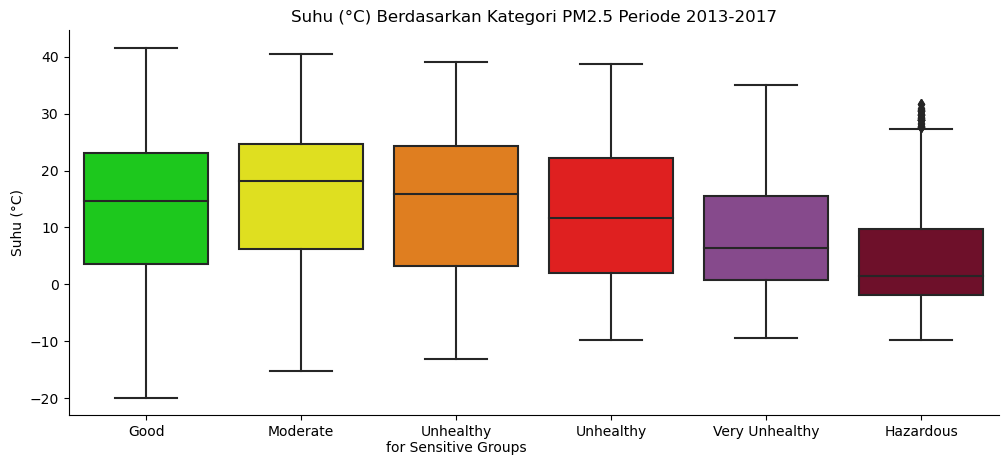

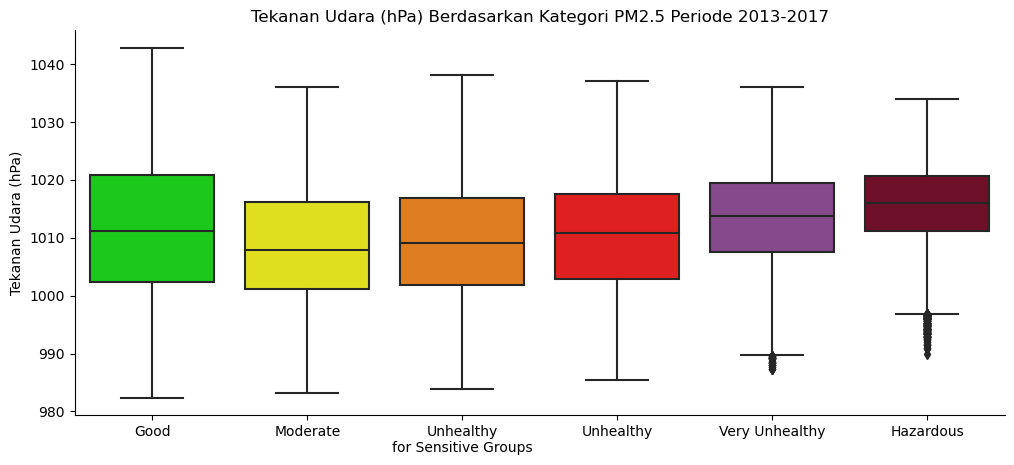

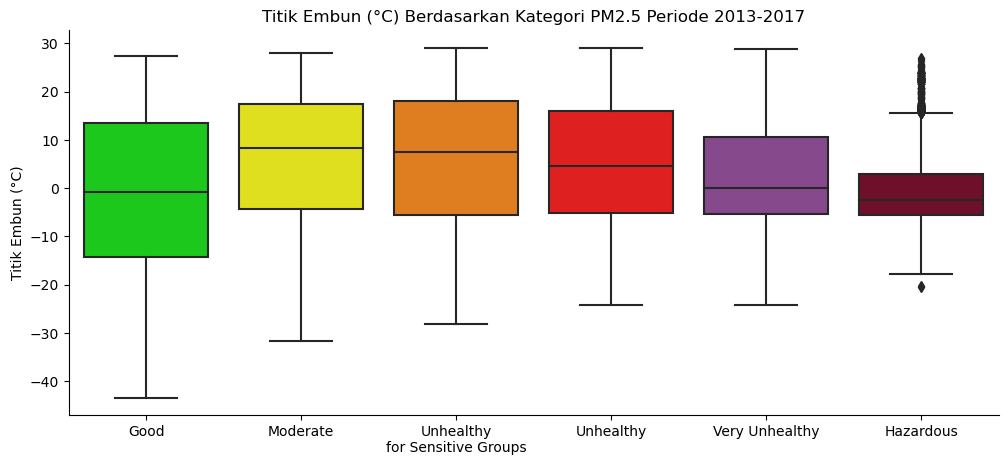

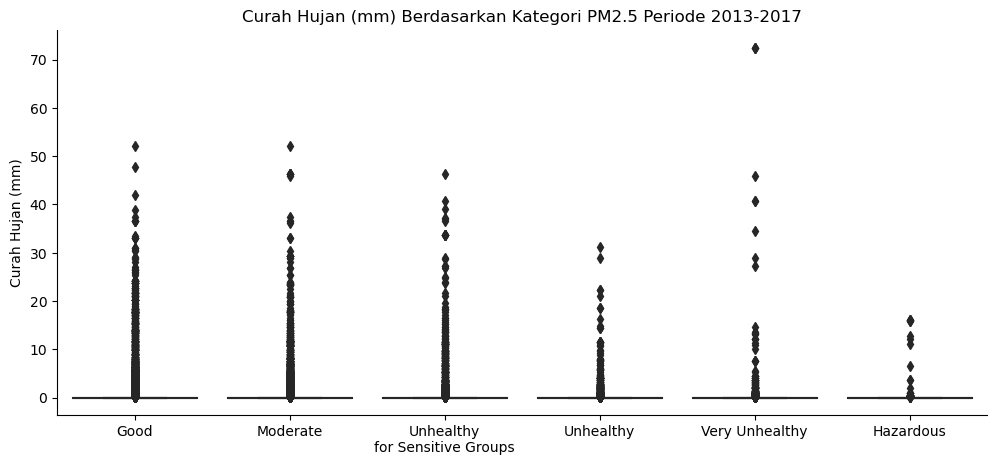

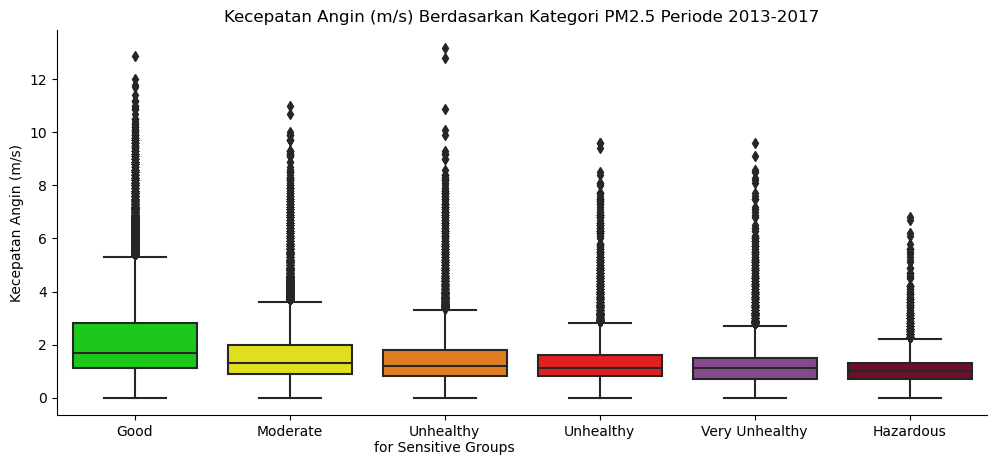

In [63]:
# Daftar variabel yang akan divisualisasikan
variables = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

# Daftar variabel yang akan divisualisasikan beserta nama lengkapnya
variables = {
    "TEMP": "Suhu (°C)",
    "PRES": "Tekanan Udara (hPa)",
    "DEWP": "Titik Embun (°C)",
    "RAIN": "Curah Hujan (mm)",
    "WSPM": "Kecepatan Angin (m/s)"
}

# Ganti label "Unhealthy for Sensitive Groups" dengan dua baris
label_mapping = {
    "Good": "Good",
    "Moderate": "Moderate",
    "Unhealthy for Sensitive Groups": "Unhealthy\nfor Sensitive Groups",
    "Unhealthy": "Unhealthy",
    "Very Unhealthy": "Very Unhealthy",
    "Hazardous": "Hazardous"
}

# Buat plot untuk setiap variabel
for var, var_name in variables.items():
    plt.figure(figsize=(12, 5))
    
    # Gunakan warna sesuai kategori AQI
    ax = sns.boxplot(x="PM2.5_cat", y=var, data=df_analyze, 
                     palette=[colors[c] for c in aqi_order])  

    # Hapus tepi atas dan kanan
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Perbarui label sumbu x
    ax.set_xticklabels([label_mapping[label] for label in aqi_order])

    plt.title(f"{var_name} Berdasarkan Kategori PM2.5 Periode 2013-2017")
    plt.xlabel("")
    plt.ylabel(var_name)

    plt.show()


**Insight:**

Suhu (°C)
- Semakin buruk kategori PM2.5, semakin rendah median suhu.
- Kategori **"Hazardous"** memiliki suhu yang lebih rendah secara keseluruhan dibandingkan kategori lainnya.
- Variasi suhu lebih besar pada kategori dengan PM2.5 lebih rendah.

Tekanan Udara (hPa)
- Kategori dengan PM2.5 lebih buruk cenderung memiliki tekanan udara lebih tinggi.
- Kategori **"Hazardous"** dan **"Very Unhealthy"** memiliki median tekanan udara lebih tinggi dibandingkan kategori lainnya.

Titik Embun (°C)
- Semakin tinggi kategori polusi, semakin rendah titik embun.
- Kategori **"Hazardous"** memiliki titik embun lebih rendah dibanding kategori lainnya.

Curah Hujan (mm)
- Tidak ada perbedaan signifikan antar kategori PM2.5.
- Sebagian besar data curah hujan dekat dengan nol dengan banyak outlier.

Kecepatan Angin (m/s)
- Kategori **"Good"** memiliki kecepatan angin lebih tinggi dibanding kategori lainnya.
- Semakin buruk kategori PM2.5, kecepatan angin cenderung lebih rendah.

## Conclusion

**Stasiun dengan Rata-rata PM2.5 Tertinggi (2013–2017) dan Tren Tahunannya**
- Stasiun dengan rata-rata PM2.5 tertinggi adalah Stasiun Dongsi diikuti dengan Nongzhanguan dan Wanshouxigong  
- Tren tahunan pada semua stasiun menunjukkan bahwa kadar PM2.5 cenderung meningkat dari 2012 hingga 2014, kemudian sedikit menurun setelahnya. 

**Jam, Hari, dan Bulan dengan Polusi PM2.5 Tertinggi (2013–2017)**
- PM2.5 paling tinggi terjadi pada pagi hari sekitar pukul 07:00–09:00 dan malam hari sekitar pukul 20:00–23:00, kemungkinan akibat aktivitas transportasi dan suhu yang lebih rendah.
- PM2.5 paling tinggi pada hari Senin dan Rabu, sedangkan secara umum Weekday lebih berpolusi deibandingkan Weekend, kemungkinan dikarenakan aktivitas masyarakat di Weekday yang lebih tinggi.
- Bulan dengan polusi tertinggi adalah Desember dan Januari, sejalan dengan tren musim dingin yang lebih berpolusi.

**Hubungan Antara Faktor Meteorologi dan PM2.5 (2013–2017)**
- Suhu (TEMP): Korelasi negatif—PM2.5 lebih tinggi saat suhu rendah.  
- Tekanan Udara (PRES): Korelasi positif—tekanan tinggi meningkatkan stabilitas atmosfer, menyebabkan polutan terjebak di dekat permukaan.  
- Titik Embun (DEWP): Korelasi positif—kondisi lembap dapat meningkatkan akumulasi partikel udara.  
- Curah Hujan (RAIN): Korelasi negatif—hujan membantu membersihkan polutan dari udara.  
- Kecepatan Angin (WSPM): Korelasi negatif—angin kencang menyebarkan polutan dan mengurangi konsentrasi PM2.5.  
- Arah Angin (wd): Beberapa arah angin tertentu membawa polusi dari sumber industri atau daerah padat kendaraan.  

**Kesimpulan Utama:**  
- Stasiun yang terletak di pinggiran kota atau daerah dengan lebih banyak ruang hijau memiliki kualitas udara yang lebih baik sedangkan stasiun yang berada di pusat kota atau daerah dengan kepadatan lalu lintas tinggi cenderung menunjukkan proporsi kualitas udara yang lebih buruk.
- Polusi PM2.5 paling tinggi terjadi di musim dingin, weekday, pagi dan malam hari.  
- Faktor meteorologi seperti suhu, tekanan udara, dan curah hujan memiliki dampak signifikan terhadap polusi udara.  


In [64]:
df_viz.to_csv('air_quality.csv', index=False)